# Intro to pytorch with linear regression models 

The objective in this homework is to get familiarity with the basic building blocks in pytorch 

In [105]:
# libraries
import torch 
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [106]:
# the function to generate the polynomial data 

def generate_poly_data(N, sigma, params):
  
   np.random.seed(100)
   x = np.random.uniform(low = -1, high = 3, size = N)
   y = [sum([i**j * params[j] for j in range(len(params))]) for i in x] 
   noise = np.random.normal(0, sigma, N)
   y = y + noise
   return x, y
    

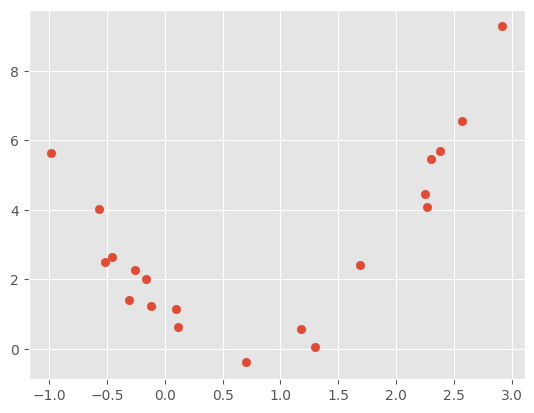

In [107]:
# generate data with N = 20
# we will be using the x, y as the training data for the following questions
x, y = generate_poly_data(20, 0.5, [1, -3, 2])
# plot x and y
plt.scatter(x, y)
plt.show()

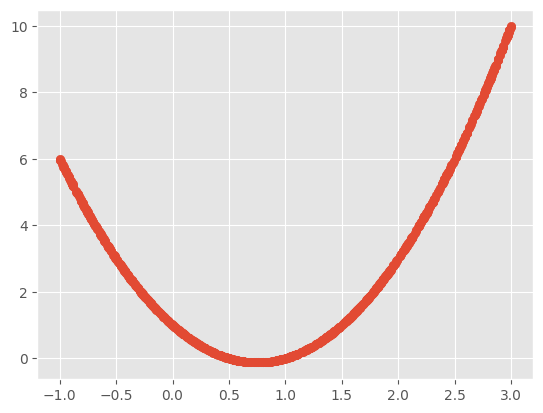

In [108]:
# Our test data 
# we can treat this test data as an approximation to the truth
# we want to make some visual comparsions as well as compute test MSEs
x_test = np.random.uniform(low = -1, high = 3, size = 1000)
y_test = np.array([2 * i ** 2 - 3 * i + 1 for i in x_test]) 
plt.scatter(x_test, y_test)
plt.show()

In [109]:
def to_numpy(tensor):
    return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

In [110]:
# We want y = wx + b

class LinearReg_module(nn.Module):
    def __init__(self, input_dim, device):
        super().__init__()
        self.input_dim = input_dim
        self.regressionLayer = nn.Linear(input_dim, 1).to(device)
    def forward(self, x):
        output = self.regressionLayer(x)
        return output 
        
        

In [111]:
# Linear regression

class pytorchLR():
    def __init__(self, 
                 n_epochs = 100,
                weight_decay = 0,
                lr = 10e-3,
                input_n = 1):
        self.n_epochs = n_epochs
        self.weight_decay = weight_decay
        self.lr = lr
        self.device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
        self.module = LinearReg_module(input_n, self.device)
        
    def fit(self, x, y):
        x = torch.tensor(x).float().to(self.device)
        y = torch.tensor(y).float().to(self.device)
        '''*** Define the loss ***'''
        loss = nn.MSELoss()
        '''*** Define the optimizer SGD ***'''
        optimizer = torch.optim.SGD(self.module.parameters(), lr = self.lr, weight_decay = self.weight_decay)
        
        for epoch in range(self.n_epochs):
            '''
            For this homework you are not required to partition the data in mini batches 
            ***
            Complete the training routine passing x trhough the network, computing the loss, calling the backpropagation 
            and computing an step with the optimizer
            ***
            '''
            optimizer.zero_grad()
            prediction = self.module(x)
            loss_value = loss(prediction, y)
            loss_value.backward()
            optimizer.step()

            
    def predict(self, x):
        self.module.eval()
        x = torch.tensor(x).float().to(self.device)
        y_hat = self.module(x)
        return to_numpy(y_hat)
            
        
        
    


In [112]:
# Create the model and fit it. For now the model is y = mx + b
model = pytorchLR(n_epochs = 5000, weight_decay = 0, lr = 1e-3)
model.fit(x[:, None], y[:, None])

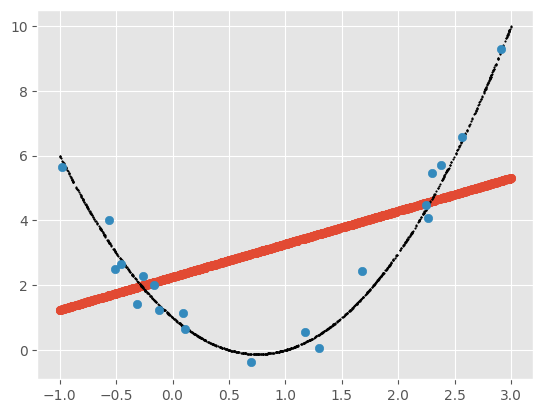

In [113]:
# Plot the predictions and the train data 
y_hat = model.predict(x_test[:, None])
plt.scatter(x_test, y_hat)
plt.scatter(x_test, y_test, c = "black", s = 1)
plt.scatter(x, y)
plt.show()

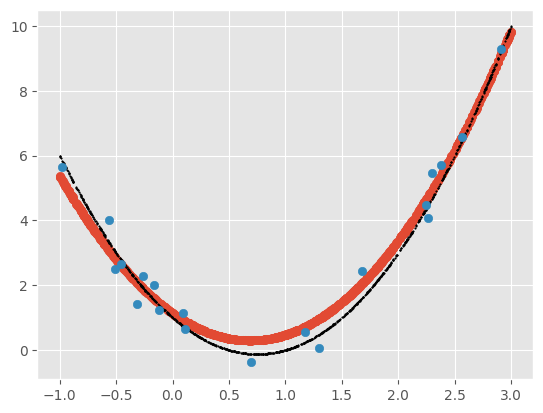

Weights: [[ 1.7837538 -2.4503436]] [1.134057], True Weights: [2, -3, 1]


In [114]:
# We known the true model is an 2nd order polynomial 
'''*** Create the data for the x and x**2, fit the model, and plot as above the training data and the predictions of the test data.
Then print the parameters of your regressionLayer or your model.module.
Did you obtain something close to the true parameters?
***'''
model = pytorchLR(n_epochs = 5000, weight_decay = 0, lr = 1e-3, input_n= 2)
x_poly = np.array([[i, i**2] for i in x])
x_test_poly = np.array([[i, i**2] for i in x_test])
model.fit(x_poly, y[:, None])

y_hat = model.predict(x_test_poly[:, None])
plt.scatter(x_test, y_hat)
plt.scatter(x_test, y_test, c = "black", s = 1)
plt.scatter(x, y)
plt.show()


print(f"Weights: {np.flip(to_numpy(model.module.regressionLayer.weight))} {np.flip(to_numpy(model.module.regressionLayer.bias))}, True Weights: [2, -3, 1]")

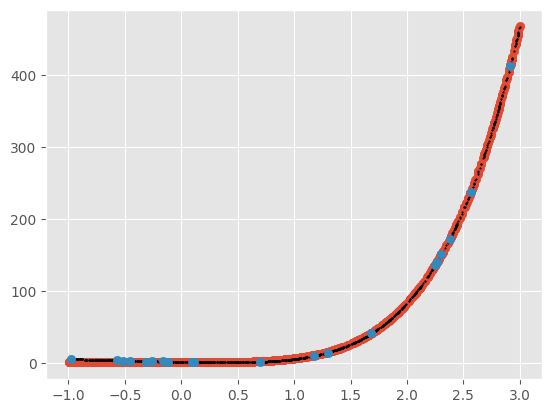

Weights: [[0.9395475  2.485383   1.2002549  0.74799514 0.12376939]] [0.45213443], True Weights: [1, -3, 2, 2, 2, 1]


In [115]:
'''*** Create the data for a 5 degree polynomial and fit it. Should you get a better MSE than for the previous two models?.
hint: you might need to play with the learning rate until you obtain a good value
***'''
params = [1, -3, 2, 2, 2, 1]
x_5_poly,y_5_poly = generate_poly_data(20, 0.5, params)
x_5_test, y_5_poly_test = generate_poly_data(1000, 0.0, params)
x_5_poly_inputs = np.array([[i, i**2, i**3, i**4, i**5] for i in x_5_poly])
x_5_poly_test = np.array([[i, i**2, i**3, i**4, i**5] for i in x_5_test])

model = pytorchLR(n_epochs = 5000, weight_decay = 0, lr = .4e-4, input_n= 5)
model.fit(x_5_poly_inputs, y_5_poly[:, None])

y_hat = model.predict(x_5_poly_test[:, None])
plt.scatter(x_5_test, y_hat)
plt.scatter(x_5_test, y_5_poly_test, c = "black", s = 1)
plt.scatter(x_5_poly, y_5_poly)
plt.show()

print(f"Weights: {np.flip(to_numpy(model.module.regressionLayer.weight))} {np.flip(to_numpy(model.module.regressionLayer.bias))}, True Weights: {params}")

Sigma: 0.1, N: 15, Weight Decay: 0, Test Error: 27845.837029376355
Sigma: 0.1, N: 15, Weight Decay: 0.2, Test Error: 28007.252791355902
Sigma: 0.1, N: 15, Weight Decay: 0.5, Test Error: 27777.146398089924


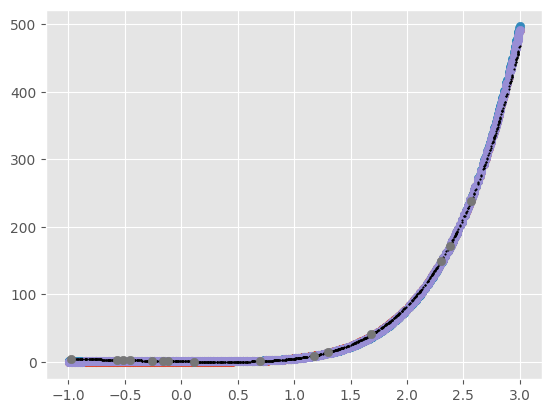

Sigma: 0.1, N: 100, Weight Decay: 0, Test Error: 26866.816908081044
Sigma: 0.1, N: 100, Weight Decay: 0.2, Test Error: 26883.616071479148
Sigma: 0.1, N: 100, Weight Decay: 0.5, Test Error: 26882.80966810159


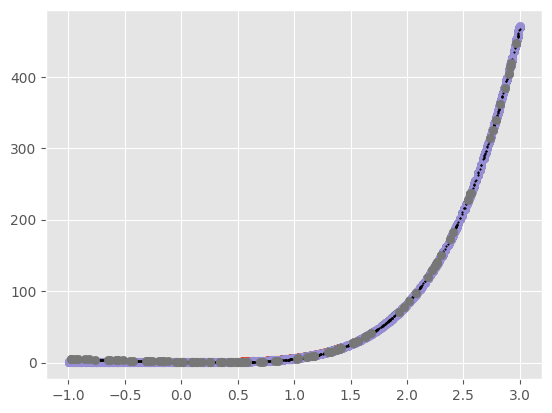

Sigma: 0.5, N: 15, Weight Decay: 0, Test Error: 27678.955862652343
Sigma: 0.5, N: 15, Weight Decay: 0.2, Test Error: 28056.381425392236
Sigma: 0.5, N: 15, Weight Decay: 0.5, Test Error: 28001.87537301896


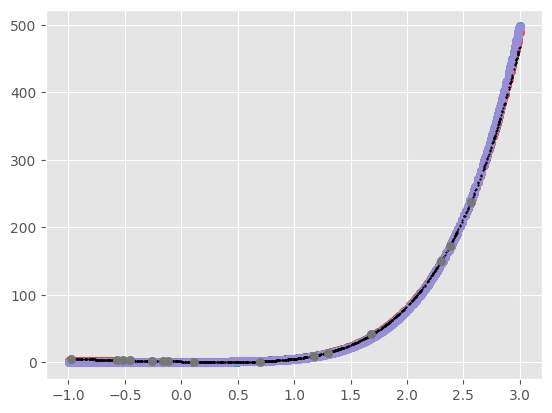

Sigma: 0.5, N: 100, Weight Decay: 0, Test Error: 26868.371777814806
Sigma: 0.5, N: 100, Weight Decay: 0.2, Test Error: 26835.07682610569
Sigma: 0.5, N: 100, Weight Decay: 0.5, Test Error: 26856.33949365786


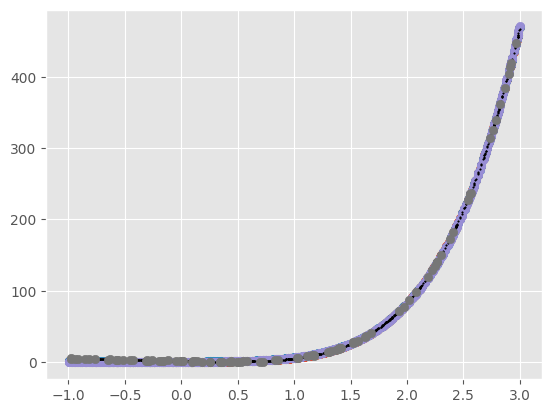

Sigma: 1, N: 15, Weight Decay: 0, Test Error: 27588.630111596733
Sigma: 1, N: 15, Weight Decay: 0.2, Test Error: 27777.741214700127
Sigma: 1, N: 15, Weight Decay: 0.5, Test Error: 27708.658689235046


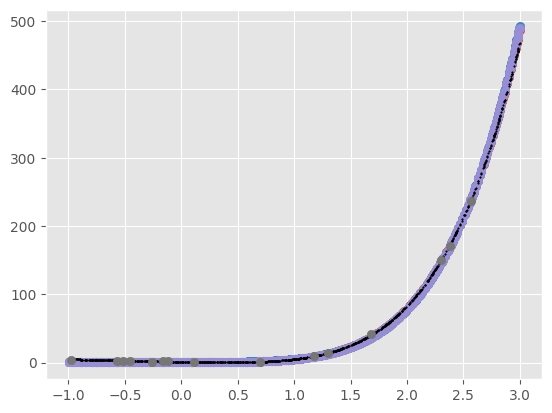

Sigma: 1, N: 100, Weight Decay: 0, Test Error: 26836.106190059425
Sigma: 1, N: 100, Weight Decay: 0.2, Test Error: 26855.881386888013
Sigma: 1, N: 100, Weight Decay: 0.5, Test Error: 26832.399485557587


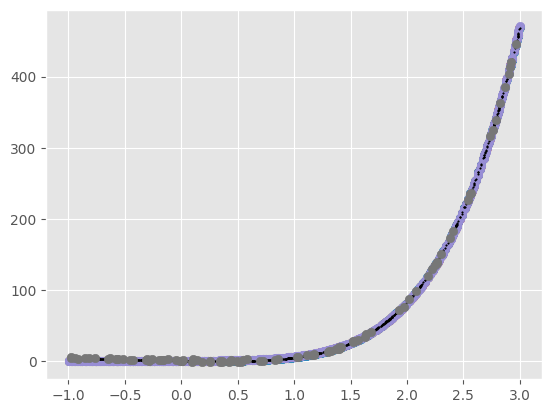

[27845.837029376355, 28007.252791355902, 27777.146398089924, 26866.816908081044, 26883.616071479148, 26882.80966810159, 27678.955862652343, 28056.381425392236, 28001.87537301896, 26868.371777814806, 26835.07682610569, 26856.33949365786, 27588.630111596733, 27777.741214700127, 27708.658689235046, 26836.106190059425, 26855.881386888013, 26832.399485557587]


In [118]:
'''*** Create a for loop for different values of sigma = [0.1, 0.5, 1], and N = [15, 100]
use a 5 degree polynomial model with different values for regularization 
weight_decay = [0, 0.2, 0.5], compute the testing error 
***'''

params = [1, -3, 2, 2, 2, 1]
sigmas = [0.1, 0.5, 1]
Ns = [15, 100]
weight_decays = [0, 0.2, 0.5]
test_errors = []

x_5_test, y_5_poly_test = generate_poly_data(1000, 0.0, params)
x_5_poly_test = np.array([[i, i**2, i**3, i**4, i**5] for i in x_5_test])

for sigma in sigmas:
    
    for n in Ns:
        x_5_poly,y_5_poly = generate_poly_data(n, sigma, params)
        x_5_poly_inputs = np.array([[i, i**2, i**3, i**4, i**5] for i in x_5_poly])

        for weight_decay in weight_decays:
            model = pytorchLR(n_epochs = 5000, weight_decay = weight_decay, lr = .3e-4, input_n= 5)
            model.fit(x_5_poly_inputs, y_5_poly[:, None])

            y_hat = model.predict(x_5_poly_test[:, None])
            test_error = np.mean((y_hat - y_5_poly_test)**2)
            print(f"Sigma: {sigma}, N: {n}, Weight Decay: {weight_decay}, Test Error: {test_error}")
            test_errors.append(test_error)
            
            plt.scatter(x_5_test, y_hat)

        plt.scatter(x_5_test, y_5_poly_test, c = "black", s = 1)
        plt.scatter(x_5_poly, y_5_poly)
        plt.show()

print(test_errors)
        
 